In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [2]:
# 데이터 불러오기
df = pd.read_csv("D:/AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [3]:
# 결측치 확인
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# 결측치 제거
#df = df.dropna()
#df

In [5]:
# 필요한 컬럼 선택
features = df[['Open', 'High', 'Low', 'Close']].values
features

array([[0.        , 4.05000019, 3.8499999 , 3.8499999 ],
       [0.        , 4.        , 3.79999995, 3.79999995],
       [0.        , 4.05000019, 3.8499999 , 3.8499999 ],
       ...,
       [2.25      , 2.25      , 2.13000011, 2.13000011],
       [2.1099999 , 2.1099999 , 2.1099999 , 2.1099999 ],
       [2.1099999 , 2.1500001 , 2.1099999 , 2.1500001 ]])

In [6]:
# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)
scaled

array([[0.        , 0.23515054, 0.2312812 , 0.22213181],
       [0.        , 0.23189585, 0.22795341, 0.21887713],
       [0.        , 0.23515054, 0.2312812 , 0.22213181],
       ...,
       [0.16304348, 0.1179821 , 0.11680534, 0.11017088],
       [0.15289854, 0.10886899, 0.11547421, 0.10886899],
       [0.15289854, 0.11147275, 0.11547421, 0.11147275]])

In [7]:
# 데이터 분리
TEST_SIZE = 2000
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

test_data.shape, train_data.shape

((2000, 4), (8098, 4))

In [8]:
# 순차 훈련 데이터 생성하기
def make_sample(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window][3])  # Close price 예측
    return np.array(X), np.array(y)

WINDOW_SIZE = 30
X_train, y_train = make_sample(train_data, WINDOW_SIZE)
X_test, y_test = make_sample(test_data, WINDOW_SIZE)

In [9]:
# ===== LSTM 모델 구축 및 학습 =====
model_lstm = Sequential([
    LSTM(32, input_shape=(WINDOW_SIZE, 4), activation='tanh'),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10


C:\Users\tjdus\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


505/505 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0061
Epoch 2/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 1.9147e-04
Epoch 3/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 1.5545e-04
Epoch 4/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 1.3532e-04
Epoch 5/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1.3180e-04
Epoch 6/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 1.1009e-04
Epoch 7/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1.0894e-04
Epoch 8/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1.1596e-04
Epoch 9/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 1.1003e-04
Epoch 10/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 9.6512e-05


In [10]:
# ===== RNN 모델 구축 및 학습 =====
model_rnn = Sequential([
    SimpleRNN(32, input_shape=(WINDOW_SIZE, 4), activation='tanh'),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0177
Epoch 2/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.3294e-04
Epoch 3/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.7426e-04
Epoch 4/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.8699e-04
Epoch 5/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.6457e-04
Epoch 6/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.6780e-04
Epoch 7/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.6381e-04
Epoch 8/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.4690e-04
Epoch 9/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.6724e-04
Epoch 10/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.3677e-04


In [11]:
# ===== 예측 =====
pred_lstm = model_lstm.predict(X_test)
pred_rnn = model_rnn.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [12]:
# ===== MSE 계산 =====
mse_lstm = mean_squared_error(y_test, pred_lstm)
mse_rnn = mean_squared_error(y_test, pred_rnn)

print(f"LSTM MSE: {mse_lstm}")
print(f"RNN MSE: {mse_rnn}")

LSTM MSE: 4.5928770691648295e-05
RNN MSE: 0.000107097267330355


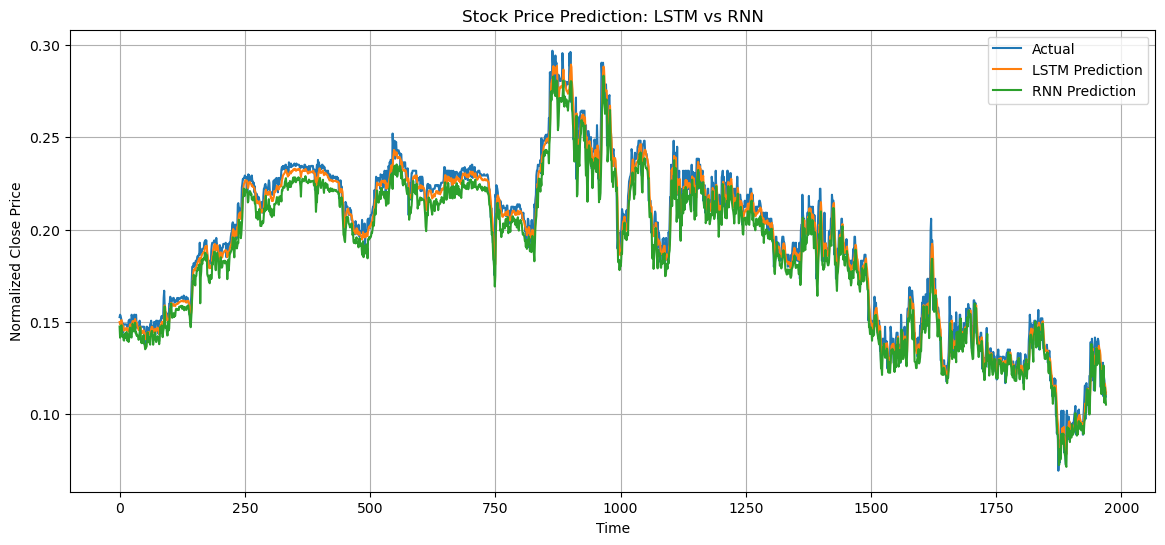

In [13]:
# ===== 시각화 =====
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual')
plt.plot(pred_lstm, label='LSTM Prediction')
plt.plot(pred_rnn, label='RNN Prediction')
plt.legend()
plt.title('Stock Price Prediction: LSTM vs RNN')
plt.xlabel('Time')
plt.ylabel('Normalized Close Price')
plt.grid()
plt.show()